In [1]:
# Let's see if we can generate a simple ToO distribution for SS objects

In [10]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from astropy.coordinates import get_sun, SkyCoord
from astropy.time import Time
import astropy.units as u

from gen_events import gen_sso_events

In [2]:
con = sqlite3.connect('baseline_v4.0_10yrs.db')

df_twi = pd.read_sql("select fieldRA,fieldDec,night,solarElong from observations where scheduler_note like '%ToO, SSO_twi%';", con)
df_night = pd.read_sql("select fieldRA,fieldDec,night,solarElong from observations where scheduler_note like '%ToO, SSO_nig%';", con)
con.close()

In [3]:
df_night

,fieldRA,fieldDec,night,solarElong
0,188.563159,-4.695595,4,145.338864
1,190.357465,-6.875623,4,147.778819
2,191.654383,-4.088869,4,147.937473
3,188.563159,-4.695595,4,145.337569
4,190.357465,-6.875623,4,147.777527
...,...,...,...,...
506,140.098901,13.265013,3606,143.557806
507,140.573117,16.022277,3606,143.201022
508,137.469424,15.074097,3606,140.602095
509,140.098901,13.265013,3606,143.536803


In [5]:
np.unique(df_twi["night"])

array([  17,   37,   49,  121,  221,  281,  285,  305,  321,  437,  470,
        493,  505,  581,  589,  605,  641,  673,  677,  761,  809,  822,
        853,  877,  882,  885,  905,  909,  921,  925,  929,  993, 1013,
       1045, 1069, 1089, 1125, 1129, 1209, 1233, 1242, 1245, 1257, 1273,
       1350, 1373, 1385, 1401, 1437, 1445, 1481, 1493, 1529, 1605, 1709,
       1789, 1794, 1829, 1833, 1909, 1925, 1941, 1957, 2001, 2041, 2113,
       2121, 2137, 2225, 2277, 2297, 2317, 2321, 2326, 2329, 2345, 2370,
       2377, 2385, 2397, 2441, 2457, 2473, 2513, 2574, 2689, 2716, 2801,
       2817, 2997, 3017, 3045, 3085, 3201, 3242, 3245, 3249, 3269, 3281,
       3285, 3297, 3317, 3393, 3405, 3437, 3441, 3557, 3565, 3617, 3649])

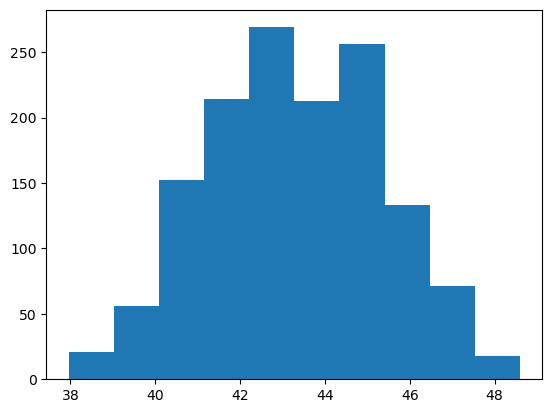

In [6]:
_ack = plt.hist(df_twi["solarElong"])

In [21]:
df_twi["solarElong"].std(), df_twi["solarElong"].mean()

(2.05546578559493, 43.304598648819486)

In [17]:
coord = SkyCoord(ra=df_twi["fieldRA"].values * u.deg, dec=df_twi["fieldDec"].values * u.deg, frame="icrs")
eclip_lat = coord.barycentrictrueecliptic.lat.deg
 

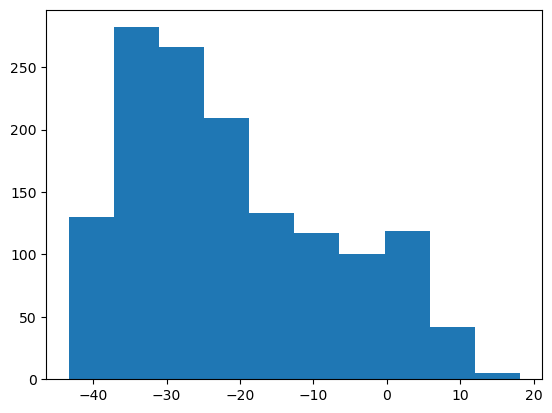

In [18]:
_ack = plt.hist(eclip_lat)

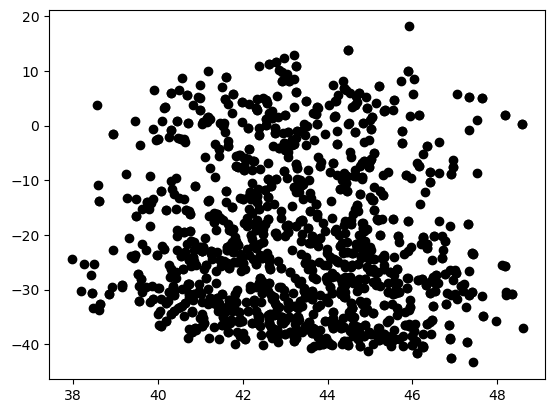

In [19]:
plt.plot(df_twi["solarElong"], eclip_lat, 'ko')

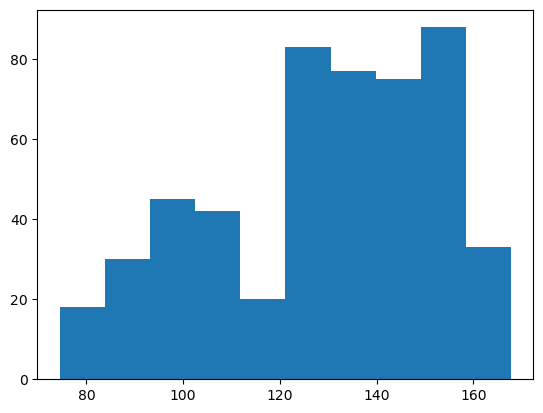

In [7]:
_ack = plt.hist(df_night["solarElong"])

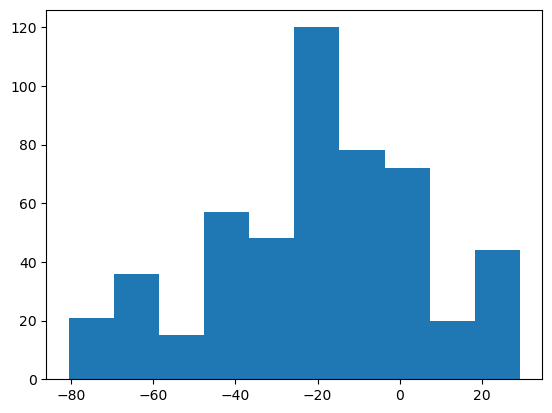

In [23]:
coord = SkyCoord(ra=df_night["fieldRA"].values * u.deg, dec=df_night["fieldDec"].values * u.deg, frame="icrs")
eclip_lat = coord.barycentrictrueecliptic.lat.deg
 

_ack = plt.hist(eclip_lat)

In [8]:
sso_e = gen_sso_events()

In [9]:
sso_e.shape

(300,)